In [39]:
import sys
print("python version: ", sys.version)

import pandas as pd
print("pandas version: ", pd.__version__)

import numpy as np
print('numpy version: ', np.__version__)

import scipy as sp
print('scipy version: ', sp.__version__)

import sklearn as skl
print('sklearn version: ', skl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns

import keras as ks
print('keras version: ', ks.__version__)
print('keras backend: ', ks.backend.backend())

import tensorflow as tf
print('tensorflow version: ', tf.__version__)

import theano as th
print('theano version: ', th.__version__)

import warnings
warnings.filterwarnings('ignore')


from keras import backend as K
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_recall_curve

import os
import random

('python version: ', '2.7.15 |Anaconda, Inc.| (default, Dec 14 2018, 19:04:19) \n[GCC 7.3.0]')
('pandas version: ', u'0.23.4')
('numpy version: ', '1.15.4')
('scipy version: ', '1.1.0')
('sklearn version: ', '0.19.2')
('keras version: ', '2.1.6')
('keras backend: ', u'tensorflow')
('tensorflow version: ', '1.10.0')
('theano version: ', '0.8.2')


In [40]:
def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

In [41]:
excel_file = r'PATH_TO_DATASET'
df = pd.DataFrame(pd.read_csv(excel_file, sep='\t'))
print(df.shape)

(7584, 208)


# Missing value means not relevant
### One Hot Encoding (All zero stands for NA)
* "Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days" (Y/N/U/NA)
* "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", "mds-delirium-scale", "recent-start-other-fall-risk-rx" (Y/N/NA)
* "mds-pressure-ulcer-stage-X", (X=1, 2, 3, 4) (Y/NA)

### Label Encoding & Sin, Cos Transform (NA: (0, 0))
* "mds-cognitive-scale": 
  - 'Independent': 0, 
  - 'Modified Independence': 1, 
  - 'Moderately Impaired': 2, 
  - 'Severely Impaired': 3
* "mds-pain-freq-last-five-days": 
  - 'Continuous': 4, 
  - 'Frequent': 3, 
  - 'Occasional': 2, 
  - 'Rare': 1, 
  - 'Unable to respond': 0,
* "mds-pain-intensity": 
  - 'None': 0, 
  - 'Mild': 1, 
  - 'Moderate': 2, 
  - 'Severe': 3, 
  - 'Very severe, horrible': 4
* "Psychotropic-X": Number
* (Added) "Psychotropic-X-Period": Number


# Drop features

* ~~"Unnamed: 51"~~, 
* ~~"pk-interaction", "pk-interaction-type"~~ 
* ~~"object-drug-1", "object-drug-1-dose", "object-drug-1-effective-dose-increase", "object-drug-1-effective-dose", "interaction-1-stop-date"~~, 
* ~~"object-drug-2", "object-drug-2-dose", "object-drug-2-effective-dose-increase", "object-drug-2-effective-dose", "interaction-2-stop-date"~~
* "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"
* "Blank-1", "Deleted-X" (X from 1 to 12), "Psychotropic-X-average-daily-dose", "Psychotropic-X-Start/End-date"
* "Entry-discharge-type"

# Encode features (originally) with no missing values

### Date-related Transform

* episodePeriod = episode-end-date - episode-start-date
* stayPeriod = stay-end-date - stay-start-date

### Drop Date-related Features

* "episode-start-date", "episode-end-date", "stay-start-date", "stay-end-date", "predictor-date", "projected-date"

### Binary Encoding (Y/N)

* "cms-long-stay", "mds-stay-trans-short-to-long",
* "mds-antianxiety-medication", "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
* "mds-anticoagulant-medication", "mds-diuretic-medication", "mds-hypnotic-medication",
* "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", "mds-dehydrated", "mds-depression", "mds-fever",
* "mds-impaired-mobility", "mds-impaired-transfer", "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions",
* "mds-vomiting", "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", "mds-impaired-locomot-other",
* "ws-antibiotic-anticoag-coexposure",
* "ws-psychotropic-with-not-ordered-weight-loss", "ws-diuretic-adl"

### One Hot Encoding

* "race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure", 

### Drop Feature
* "PPS-assessment", "Federal-assessment"

### Mapping

* mds-pain-non-verbal {'None/Mild':0,'Moderate/Severe':1}

# Features need imputation
### One Hot Encoding

1. Binary categories (Yes/No/NA)
   * "pneumonia", "uti", "mdro", "anemia", "septicemia", "constipation", 
   * "wound", "hyponatremia", "hyperkalemia", "embolisms", 
   * "alzheimers", "anxiety", "depression", "non-alz-dimentia", 
   * "bipolar", "parkinsons", "psychosis", "schizophrenia", "seizure", "aphasia", "emphysema", 
   * "arthritis", "ashd", "bph", "cancer", "cerebralpalsy", "stroke", "cirrhosis", "comatose", 
   * "diabetes", "dysrhythmias", "gerd", "heart-failure", "hemiplegia/hemiparesis", "hepatitis", 
   * "huntingtons", "hyperlipidemia", "hyperthyroidism", "hypothyroidism", "hypertension", 
   * "hypotension", "multiple-sclerosis", "neurogenic-bladder", "obstructive-uropathy", 
   * "osteoporosis", "paraplegia", "ptsd", "pvd", "quadriplegia", "thyroid-disorder", 
   * "tourettes", "transient-ischemic-attack", "traumatic-brain-injury", "tuberculosis", "renal-failure", 

   * "mds-delirium-scale", "mds-pain-medication", "mds-received-pain-tx-non-pharm ", "mds-received-prn-pain-medication",
   * "mds-conduct-staff-assessment-mental-status", "mds-pressure-ulcer-prsnt", "conduct_bims", "acute_mental_change",
   * "conduct_pain_assmnt", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", 
   * "limb_prosthesis_past_7_days", "no_listed_mobility_device", 


2. Other categories

   * "marital-status": 
     - "Never Married", "Married", "Widowed", "Separated", "Divorced"
   * "mds-entered-from": 
     - "Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", "Inpatient rehabilitation facility"
     - "Community (private home/apt., board/care, assisted living, group home)",  "Other", 
   * "mds-excess-weight-loss": 
     - "Yes - prescribed", "Yes - not prescribed", "No or unknown"
   * "balance_while_standing", "balance_while_walking", "balance_turning_around", "balance_toileting", "balance_bed_to_chair"
     - "Steady at all times", "able to stabilize without assistance", "able to stabilize with assistance", "Activity did not occur"
    
### Label Encoding
* "mds-urinary-incontinence"
  - "Always continent": 0, 
  - "Occasionally incontinent": 1,
  - "Frequently incontinent": 2,
  - "Always incontinent": 3,
  - "Catheter - not rated": (0, 0)


* "cam_inattention",
* "cam_disorganized_thought",
* "cam_altered_conc",
* "cam_motor_retardation"
  - "Behavior not present": 0,
  - "Behavior present, fluctuates": 1, 
  - "Behavior continuously present": 2, 

   
* "functlimit_rom_upper", 
* "functlimit_rom_lower"
   - "No impairment": 0, 
   - "Impairment on one side": 1, 
   - "Impairment on both sides": 2 


* "does_resident_wander"
   - "Behavior not exhibited": 0, 
   - "1 to 3 days": 1, 
   - "4 to 6 days": 2, 
   - "occurred daily": 3,

# Features from new dataset
* "atc_X" (X from 1 to 5) - drop in strategy 1
* "number_of_behavior_changes" - keep
* "min_effective_dose_X" - drop
* "psych_sdd_X" - drop in strategy 1

In [42]:
# Get atc codes
atc_list = []
for i in range(1, 6):
    atc_list.append(df.groupby('atc_%d' % i)['min_effective_dose_%d' % i].first())
atc_codes = pd.concat(atc_list)
atc_codes = atc_codes[~atc_codes.index.duplicated()].index.tolist()

# Fill missing min_effective_dose
atc_dic = [('N03AE01', 0.5), ('N05AB04', 15), ('N05AX13', 3), ('N05CD04', 1), ('N06AX21', 60), ('N06AX24', 20), \
           ('N06AX23', 50)]
for code, dose in atc_dic:
    for i in range(1, 6):
        df.loc[df['atc_%d' % i] == code, 'psych_sdd_%d' % i] = \
            df.loc[df['atc_%d' % i] == code, 'Psychotropic-%d-average-daily-dose' % i] / dose

# Set sdd=0 to NA
for i in range(1, 6):
    df.loc[df['psych_sdd_%d' % i] == 0, 'psych_sdd_%d' % i] = np.nan

In [43]:
# drop feature
def drop_features(df, f):
    df.drop(f, axis=1, inplace=True)

In [44]:
# one hot encoding
def one_hot_encoding(df, features, categories):
    for f, c in zip(features, categories):
        df[f] = df[f].astype('category', categories=c)
    return pd.get_dummies(df, columns=features, prefix=features)

In [45]:
# compute date difference
def date_diff(start, end):
    return (pd.to_datetime(end) - pd.to_datetime(start)) / np.timedelta64(1, 'D')

In [46]:
# generate date diff features
def generate_period(df, f):
    for start, end, period in f:
        df[period] = date_diff(df[start], df[end])
        df.drop([start, end], axis=1, inplace=True)

In [47]:
# label encoding
def label_encoding(df, features, dictionaries):
    for f, dic in zip(features, dictionaries):
        df[f] = df[f].map(dic)

In [48]:
# sin&cos transform
def col_transform(df, col, mmax, mmin, df_ref=None):
    if(mmax <= mmin):
        # for test set, if max&min not set, use training set value
        if(df_ref is not None): 
            mmax = df_ref[col].max()
            mmin = df_ref[col].max()
        else:
            mmax = df[col].max()
            mmin = df[col].min()
    angle = 0.25 * np.pi * (df[col] - mmin) / (mmax - mmin) + 0.125 * np.pi
    return (np.cos(angle), np.sin(angle))

def df_transform(df, f, df_ref=None):
    for col, mmax, mmin in f:
        df[col + '_x'], df[col + '_y'] = col_transform(df, col, mmax, mmin, df_ref)
        df[col + '_x'].fillna(0, inplace=True)
        df[col + '_y'].fillna(0, inplace=True)
        df.drop(col, axis=1, inplace=True)

In [49]:
# train test split
from sklearn.model_selection import GroupShuffleSplit
def train_test_split(df, target, groupby, radio, random_state):
    train_idx, test_idx = GroupShuffleSplit(train_size=radio, random_state=random_state).split(df, target, df[groupby]).next()
    return df.iloc[train_idx], df.iloc[test_idx], target.iloc[train_idx], target.iloc[test_idx]

In [50]:
# missing data describe
def missing_summary(df):
    missing_cnt = df.isna().sum()
    missing_data = pd.concat([missing_cnt, missing_cnt/df.shape[0]], axis=1, keys=['count', 'percentage'])
    return missing_data[missing_data['percentage'] != 0].sort_values(by='percentage', ascending=False)

In [51]:
# Drop features
f_drop = ["Blank-1", "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"] + \
         ['Deleted-%d' % i for i in range(1, 13)] + ['Psychotropic-%d' % i for i in range(1, 6)] + \
         ['Psychotropic-%d-average-daily-dose' % i for i in range(1, 6)] + ["Entry-discharge-type"]

f_drop += ["acute_mental_change", "aphasia", "balance_toileting", "balance_turning_around", "bipolar", "bph", \
           "cam_motor_retardation", "cerebralpalsy", "cirrhosis", "cms-long-stay", "comatose", "conduct_pain_assmnt",\
           "dysrhythmias", "embolisms", "facility", "hemiplegia/hemiparesis", "hepatitis", "huntingtons", "hyperkalemia",\
           "hypertension", "hyperthyroidism", "hyponatremia", "hypotension", "hypothyroidism", \
           "limb_prosthesis_past_7_days", "marital-status", "mds-conduct-staff-assessment-mental-status", \
           "mds-dehydrated", "mds-delirium-scale", "mds-excess-weight-loss", "mds-long-term-memory-ok", \
           "mds-pressure-ulcer-stage-1", "mds-pressure-ulcer-stage-2", "mds-pressure-ulcer-stage-3", \
           "mds-pressure-ulcer-stage-4", "mds-short-term-memory-ok", "mds-staff-assess-pain", "multiple-sclerosis", \
           "neurogenic-bladder", "obstructive-uropathy", "paraplegia", "pneumonia", "ptsd", "pvd", "quadriplegia", \
           "renal-failure", "schizophrenia", "septicemia", "stroke", "tourettes", "traumatic-brain-injury", \
           "tuberculosis", "wound", "ws-antibiotic-anticoag-coexposure", "ws-diuretic-adl", \
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure",\
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", \
           "ws-psychotropic-with-not-ordered-weight-loss", "ws-tramadol-antidepressant-coexposure"]
 
# Missing value means not relevant
f_one_hot = ["Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days", \
             "recent-start-other-fall-risk-rx"]
cate_one_hot = [['Yes', 'No', 'Unable to answer']] * 3 + [['Yes', 'No']]

f_period = [("Psychotropic-%d-Start-date" % i, 'Psychotropic-%d-End-date' % i, 'Psychotropic-%d-Period' % i) for i in range(1, 6)]

f_label = ['mds-cognitive-scale', 'mds-pain-freq-last-five-days', 'mds-pain-intensity']
dic_label = [{'Independent': 0, 'Modified Independence': 1, 'Moderately Impaired': 2, 'Severely Impaired': 3}, \
             {'Continuous': 4, 'Frequent': 3, 'Occasional': 2, 'Rare': 1, 'Unable to respond': 0}, \
             {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe, horrible': 4}]

f_transform = [('mds-cognitive-scale', 3, 0), ('mds-pain-freq-last-five-days', 4, 0), ('mds-pain-intensity', 4, 0)] + \
              [('Psychotropic-%d-Period' % i, 0, 0) for i in range(1, 6)]

In [52]:
# Encode features (originally) with no missing values
f_drop += ["predictor-date", "projected-date", "PPS-assessment", "Federal-assessment"]

f_period += [('episode-start-date', 'episode-end-date', 'episode-period'),\
             ('stay-start-date', 'stay-end-date', 'stay-period')]

f_label += ["mds-stay-trans-short-to-long", "mds-antianxiety-medication", \
            "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
            "mds-anticoagulant-medication", "mds-diuretic-medication", \
            "mds-hypnotic-medication", "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", \
            "mds-depression", "mds-fever", "mds-impaired-mobility", "mds-impaired-transfer", \
            "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions", "mds-vomiting", \
            "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", \
            "mds-impaired-locomot-other"] + ["mds-pain-non-verbal"]
dic_label += [{'Yes': 1, 'No': 0}] * 22 + [{'None/Mild':0,'Moderate/Severe':1}]

f_one_hot += ["race", "gender", "mds-bims-summary-ranking"]
cate_one_hot += [['White', 'Black', 'Other'], \
                 ['Female', 'Male'], ['Intact or Moderately Intact', 'Moderate Impairment']]

In [53]:
# Features need imputation
f_one_hot += ["uti", "mdro", "anemia", "constipation", "alzheimers", "anxiety", "depression", "non-alz-dimentia", \
              "parkinsons", "psychosis", "seizure", "emphysema", "arthritis", "ashd", "cancer", "diabetes", "gerd",\
              "heart-failure", "osteoporosis", "thyroid-disorder", "transient-ischemic-attack", "mds-pain-medication", \
              "mds-received-pain-tx-non-pharm", "mds-received-prn-pain-medication", "mds-pressure-ulcer-prsnt", \
              "conduct_bims", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", \
              "no_listed_mobility_device", "hyperlipidemia"] + \
              ["balance_while_standing", "balance_while_walking", "balance_bed_to_chair"] + ["mds-entered-from"]
cate_one_hot += [['Yes', 'No']] * 31 + \
                [["Steady at all times", "able to stabilize without assistance", \
                  "able to stabilize with assistance", "Activity did not occur"]] * 3 + \
                [["Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", \
                  "Inpatient rehabilitation facility",
                  "Community (private home/apt., board/care, assisted living, group home)", "Other"]]

f_label += ["mds-urinary-incontinence", "functlimit_rom_upper", "functlimit_rom_lower", "does_resident_wander"] + \
           ["cam_inattention", "cam_disorganized_thought", "cam_altered_conc"]
dic_label += [{"Always continent": 0, "Occasionally incontinent": 1, "Frequently incontinent": 2,\
               "Always incontinent": 3, "Catheter - not rated": np.nan}] + \
             [{"No impairment": 0, "Impairment on one side": 1, "Impairment on both sides": 2}] * 2 + \
             [{"Behavior not exhibited": 0, "1 to 3 days": 1, "4 to 6 days": 2, "occurred daily": 3}] + \
             [{"Behavior not present": 0, "Behavior present, fluctuates": 1, "Behavior continuously present": 2}] * 3

f_transform += [("mds-urinary-incontinence", 3, 0), ("cam_inattention", 2, 0), ("cam_disorganized_thought", 2, 0), \
                ("cam_altered_conc", 2, 0), ("functlimit_rom_upper", 2, 0), \
                ("functlimit_rom_lower", 2, 0), ("does_resident_wander", 3, 0)]

In [54]:
# Features from new dataset
f_drop += ["min_effective_dose_%d" % i for i in range(1, 6)]

f_one_hot += ["atc_%d" % i for i in range(1, 6)]
cate_one_hot += [atc_codes] * 5

f_transform += [('psych_sdd_%d' % i, 0, 0) for i in range(1, 6)]

In [55]:
# generate target
target = df['outcome-Mds-fall-since-prior-assessment'].map({'None': 0, 'Yes': 1})
dff = df.drop(['outcome-mds-fall-no-injury', 'outcome-mds-fall-minor-injury', 'outcome-mds-fall-major-injury', \
               'outcome-Mds-fall-since-prior-assessment', 'outcome-riskmaster-fall-incident'], axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, 'patient-id', 0.7, 0)
print 'Total number of patients: %d' % len(df.groupby('patient-id'))
print 'Number of patients in training set: %d' % len(X_train.groupby('patient-id'))

Total number of patients: 3133
Number of patients in training set: 2193


In [57]:
%%time
generate_period(X_train, f_period)
label_encoding(X_train, f_label, dic_label)
X_train_original = X_train.copy() # store value range
df_transform(X_train, f_transform)
X_train = one_hot_encoding(X_train, f_one_hot, cate_one_hot)
drop_features(X_train, f_drop)

CPU times: user 28.7 s, sys: 524 ms, total: 29.3 s
Wall time: 39.6 s


In [58]:
X_train_use = X_train.copy()

In [59]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index([], dtype='object')


In [60]:
missing_summary(X_train_use)

,count,percentage


In [61]:
%%time
generate_period(X_test, f_period)
label_encoding(X_test, f_label, dic_label)
df_transform(X_test, f_transform, X_train_original)
X_test = one_hot_encoding(X_test, f_one_hot, cate_one_hot)
drop_features(X_test, f_drop)

CPU times: user 21.7 s, sys: 28 ms, total: 21.7 s
Wall time: 34 s


In [62]:
X_test_use = X_test.copy()

In [63]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index([], dtype='object')


In [64]:
missing_summary(X_train_use)

,count,percentage


In [65]:
X_train_use.shape

(5311, 398)

In [66]:
X_test_use.shape

(1512, 398)

In [67]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from numpy.random import seed
from tensorflow import set_random_seed

In [68]:
def find_best_f1(y_predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1) 
    max_f1, th = 0, 0
    for threshold in thresholds:
        f1 = f1_score(y_true, y_predict > threshold)
        if(f1 > max_f1):
            max_f1 = f1
            th = threshold
    return max_f1, th

In [69]:
# drop patient ID for basic models

from sklearn.preprocessing import MinMaxScaler

def scaler_transform(X_train_use, X_test_use):    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_use.drop('patient-id', axis=1))
    X_train_transformed = pd.DataFrame(scaler.transform(X_train_use.drop('patient-id', axis=1)), \
                                       columns=X_train_use.columns[1:], index=X_train_use.index)                                   
#     X_train_transformed['patient-id'] = X_train_use['patient-id']
    X_test_transformed = pd.DataFrame(scaler.transform(X_test_use.drop('patient-id', axis=1)), \
                                       columns=X_test_use.columns[1:], index=X_test_use.index) 
#     X_test_transformed['patient-id'] = X_test_use['patient-id']
    return X_train_transformed, X_test_transformed

In [70]:
X_train_transformed, X_test_transformed = scaler_transform(X_train_use, X_test_use)

In [71]:
X_train_transformed

,current-stay-days,cumulative-days-in-facility,mds-stay-trans-short-to-long,age,mds-antianxiety-medication,mds-antidepressant-medication,mds-antipsychotic-medication,mds-antibiotic-medication,mds-anticoagulant-medication,mds-diuretic-medication,...,atc_5_N06AB10,atc_5_N06AX05,atc_5_N06AX11,atc_5_N06AX12,atc_5_N06AX16,atc_5_N06AX21,atc_5_N06AX24,atc_5_N05AA01,atc_5_N05BA05,atc_5_N06AX23
0,0.006369,0.006369,0.0,0.558140,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006369,0.006369,1.0,0.755814,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006369,0.006369,0.0,0.755814,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006369,0.006369,1.0,0.674419,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.006369,0.006369,0.0,0.825581,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.006369,0.006369,1.0,0.825581,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.006369,0.042463,1.0,0.825581,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.006369,0.012739,1.0,0.686047,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.006369,0.006369,1.0,0.918605,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.006369,0.006369,0.0,0.790698,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Basic Model Experiment: Use non-missing values to train model

In [72]:
from sklearn import preprocessing ## for standarScaler
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.core.frame import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor,RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.cross_validation import *
from sklearn.svm import LinearSVC

In [73]:
def metrics_m_prob (model,X_train_transformed,X_test_transformed,y_train,y_test):
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_test_transformed)
    accuracy=accuracy_score(y_test,prediction)
    precision=precision_score(y_test, prediction) # get precision score
    recall=recall_score(y_test, prediction) # get recall score
    F1=f1_score(y_test, prediction) # get F1 score

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    specificity=float(tn) / (tn+fp) # get specificity score
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction_prob)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score

    dic_=  dict([('accuracy', accuracy), ('precision', precision), ('recall', recall),('F1',F1),('specificity', specificity),('AUROC', roc_auc)])
    dic_df=pd.DataFrame(pd.Series(dic_),columns=['Score'])
    dic_df=dic_df.reset_index().rename(columns={'index':'metrics'})
    
    
    
    f1, th = find_best_f1(prediction_prob, y_test)

    ## maximum F1
    y_threshold = prediction_prob > th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()

    
    dic_f1= dict([('accuracy', accuracy_score(y_test, y_threshold)), ('precision', precision_score(y_test, y_threshold)), ('recall', recall_score(y_test, y_threshold)),('F1',f1_score(y_test, y_threshold)),('specificity', (float(tn) / (tn+fp)))])
    dic_df_f1=pd.DataFrame(pd.Series(dic_f1),columns=['Score'])
    dic_df_f1=dic_df_f1.reset_index().rename(columns={'index':'metrics'})
   
    return dic_df,dic_df_f1,th


In [74]:
def metrics_m_pre (model,X_train_transformed,X_test_transformed,y_train,y_test):
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_test_transformed)
    accuracy=accuracy_score(y_test,prediction)
    precision=precision_score(y_test, prediction) # get precision score
    recall=recall_score(y_test, prediction) # get recall score
    F1=f1_score(y_test, prediction) # get F1 score

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    specificity=float(tn) / (tn+fp) # get specificity score
#     prediction_prob=Model.predict_proba(X_test_transformed)
#     prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score

    dic_=  dict([('accuracy', accuracy), ('precision', precision), ('recall', recall),('F1',F1),('specificity', specificity),('AUROC', roc_auc)])
    dic_df=pd.DataFrame(pd.Series(dic_),columns=['Score'])
    dic_df=dic_df.reset_index().rename(columns={'index':'metrics'})
    
    
    
    f1, th = find_best_f1(prediction, y_test)

    ## maximum F1
    y_threshold = prediction> th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()

    
    dic_f1= dict([('accuracy', accuracy_score(y_test, y_threshold)), ('precision', precision_score(y_test, y_threshold)), ('recall', recall_score(y_test, y_threshold)),('F1',f1_score(y_test, y_threshold)),('specificity', (float(tn) / (tn+fp)))])
    dic_df_f1=pd.DataFrame(pd.Series(dic_f1),columns=['Score'])
    dic_df_f1=dic_df_f1.reset_index().rename(columns={'index':'metrics'})
   
    return dic_df,dic_df_f1,th


In [75]:
def AUROC_Tain_prob(model,X_train_transformed,y_train):
    # training set
    Model = model.fit(X_train_transformed, y_train)
    # prediction=Model.predict(X_train_transformed)
    prediction_prob=Model.predict_proba(X_train_transformed)
    prediction_prob=prediction_prob[:,1]


    fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
    return roc_auc

In [76]:
def AUROC_Tain_pre(model,X_train_transformed,y_train):
    # training set
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_train_transformed)
#     prediction_prob=Model.predict_proba(X_train_transformed)
#     prediction_prob=prediction_prob[:,1]


    fpr, tpr, tresholds = roc_curve(y_train, prediction)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
    return roc_auc

In [83]:
def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [84]:
def drawAUROC (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction_prob)

    f1, th = find_best_f1(prediction_prob, y_test)
    y_threshold = prediction_prob > th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()
    recall=recall_score(y_test, y_threshold)
    specificity=(float(tn) / (tn+fp))


    import csv 
    fpr, tpr, thresholds = roc_curve(y_test, prediction_prob, pos_label=1)
    plot_roc_curve(fpr, tpr)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fpr, tpr, [recall, 1-specificity]])

In [103]:
from sklearn.calibration import calibration_curve
import csv 

def calibPlots (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prediction_prob, n_bins=10)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fraction_of_positives, mean_predicted_value])

    plt.figure()
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.show()


In [108]:
from sklearn.calibration import calibration_curve
import csv 

def calibPlots_normalized (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prediction_prob, normalize=True, n_bins=10)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fraction_of_positives, mean_predicted_value])

    plt.figure()
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.show()

# tuning hyperparameters for Logistic regression based on "roc_auc"

In [100]:
parameters={'C':[0.25,0.5, 0.75, 1,1.5], 'solver':('liblinear','sag','newton-cg', 'lbfgs')}
model = LogisticRegression(penalty='l2',class_weight='balanced',random_state=100)
clf = GridSearchCV(model, parameters, n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'C': 0.25, 'solver': 'liblinear'}
             precision    recall  f1-score   support

          0       0.88      0.72      0.79      1229
          1       0.32      0.56      0.40       283

avg / total       0.77      0.69      0.72      1512



In [130]:
clf_model=LogisticRegression(penalty='l2',class_weight='balanced',C=0.25,solver='liblinear',random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [131]:
results[0]

,metrics,Score
0,AUROC,0.693146
1,F1,0.404609
2,accuracy,0.692460
3,precision,0.317269
4,recall,0.558304
5,specificity,0.723352


In [132]:
results[1]

,metrics,Score
0,F1,0.418283
1,accuracy,0.722222
2,precision,0.343964
3,recall,0.533569
4,specificity,0.765663


In [133]:
results[2]

0.5279423264778651

In [134]:

# training set
Model = LogisticRegression(penalty='l2',class_weight='balanced',C=0.25, solver='liblinear',random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.7640332880726549

### LR AUROC curve

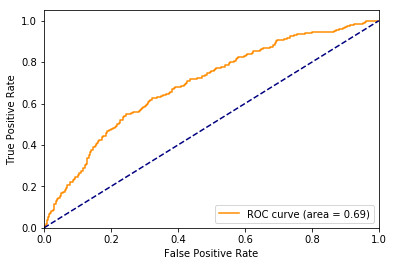

In [85]:
model=LogisticRegression(penalty='l2',class_weight='balanced',C=0.25, solver='liblinear',random_state=100) # LR
drawAUROC(model,'LR_exp_3.csv')

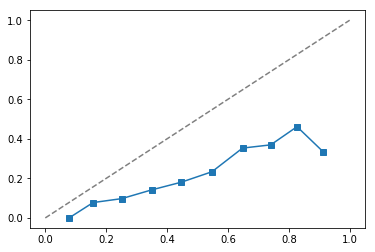

In [104]:
model=LogisticRegression(penalty='l2',class_weight='balanced',C=0.25, solver='liblinear',random_state=100)
calibPlots(model,'LR_exp_3_cal.csv')

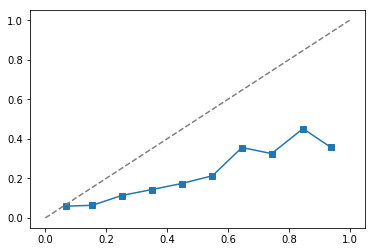

In [109]:
model=LogisticRegression(penalty='l2',class_weight='balanced',C=0.25, solver='liblinear',random_state=100)
calibPlots_normalized(model,'LR_exp_3_NorCal.csv')

# tuning hyperparameters for randomForest Tree based on "roc_auc"

In [ ]:
#####################################################  test with small range

In [77]:
parameters={'criterion':('gini','entropy'),'n_estimators':range(11,201,10),'max_depth':range(1,11,2), 'max_leaf_nodes':range(5,30,5)}
model = RandomForestClassifier(class_weight='balanced',random_state=100)
clf = GridSearchCV(model, parameters,n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'n_estimators': 181, 'max_leaf_nodes': 25, 'criterion': 'entropy', 'max_depth': 7}
             precision    recall  f1-score   support

          0       0.86      0.76      0.81      1229
          1       0.31      0.46      0.37       283

avg / total       0.76      0.71      0.73      1512



In [78]:
clf_model=RandomForestClassifier(class_weight='balanced',n_estimators=181,max_leaf_nodes=25,criterion='entropy',max_depth=7,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [79]:
results[0]

,metrics,Score
0,AUROC,0.691291
1,F1,0.368272
2,accuracy,0.705026
3,precision,0.307329
4,recall,0.459364
5,specificity,0.761595


In [80]:
results[1]

,metrics,Score
0,F1,0.402010
1,accuracy,0.685185
2,precision,0.311891
3,recall,0.565371
4,specificity,0.712775


In [81]:
results[2]

0.4764909623805918

In [82]:
clf_model=RandomForestClassifier(class_weight='balanced',n_estimators=181,max_leaf_nodes=25,criterion='entropy',max_depth=7,random_state=100)
# training set
AUROC_Tain_prob (clf_model,X_train_transformed,y_train)  ## return the training set AUROC score

0.7873028930493473

In [ ]:
############################################################

### final model with more aggresive hyper-parameter but with better performance on training set

In [103]:
parameters={'criterion':('gini','entropy'),'n_estimators':[200,800,1000,1500,2000,2500,3000],'max_depth':[10,20,30,50,65,80], 'max_leaf_nodes':[100,150,180,200,250]}
model = RandomForestClassifier(class_weight='balanced',random_state=100)
clf = GridSearchCV(model, parameters,n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'n_estimators': 2500, 'max_leaf_nodes': 200, 'criterion': 'gini', 'max_depth': 30}
             precision    recall  f1-score   support

          0       0.83      0.93      0.88      1229
          1       0.38      0.18      0.24       283

avg / total       0.75      0.79      0.76      1512



In [135]:
clf_model=RandomForestClassifier(class_weight='balanced',n_estimators=2500,max_leaf_nodes=200,criterion='gini',max_depth=30,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [136]:
results[0]

,metrics,Score
0,AUROC,0.703864
1,F1,0.243437
2,accuracy,0.790344
3,precision,0.375000
4,recall,0.180212
5,specificity,0.930838


In [137]:
results[1]

,metrics,Score
0,F1,0.408734
1,accuracy,0.552249
2,precision,0.271462
3,recall,0.826855
4,specificity,0.489015


In [138]:
results[2]

0.2777968859035615

In [143]:

# training set
Model = RandomForestClassifier(class_weight='balanced',n_estimators=2500,max_leaf_nodes=200,criterion='gini',max_depth=30,random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.9599365123414401

### Random Forest Tree AUROC curve

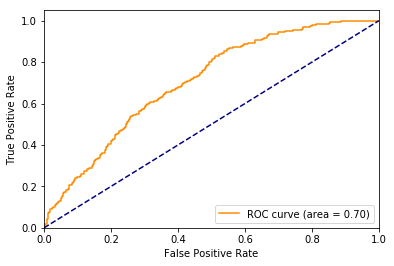

In [88]:
model=RandomForestClassifier(class_weight='balanced',n_estimators=2500,max_leaf_nodes=200,criterion='gini',max_depth=30,random_state=100) # RF
drawAUROC(model,'RF_exp_3.csv')

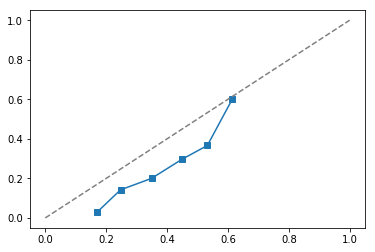

In [105]:
model=RandomForestClassifier(class_weight='balanced',n_estimators=2500,max_leaf_nodes=200,criterion='gini',max_depth=30,random_state=100) # RF
calibPlots(model,'RF_exp_3_cal.csv')

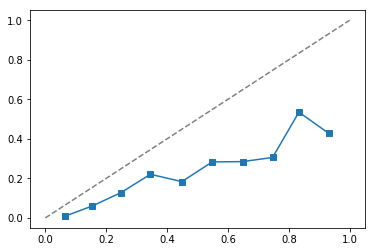

In [110]:
model=RandomForestClassifier(class_weight='balanced',n_estimators=2500,max_leaf_nodes=200,criterion='gini',max_depth=30,random_state=100) 
calibPlots_normalized(model,'RF_exp_3_NorCal.csv')

# tuning hyperparameters for MultinomialNB based on "roc_auc"

In [44]:
from sklearn.naive_bayes import MultinomialNB
parameters={'fit_prior':[True,False],'alpha':[0.3,0.4,0.5,0.6,0.7,0.8,1,1.2,1.5]}
model = MultinomialNB()
clf = GridSearchCV(model, parameters,n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))


The parameters of the best model are: 
{'alpha': 1, 'fit_prior': True}
             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1229
          1       0.38      0.23      0.28       283

avg / total       0.75      0.79      0.76      1512



In [139]:
clf_model=MultinomialNB(alpha=1,fit_prior=True)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [140]:
results[0]

,metrics,Score
0,AUROC,0.676758
1,F1,0.282561
2,accuracy,0.785053
3,precision,0.376471
4,recall,0.226148
5,specificity,0.913751


In [141]:
results[1]

,metrics,Score
0,F1,0.389787
1,accuracy,0.525794
2,precision,0.256726
3,recall,0.809187
4,specificity,0.460537


In [142]:
results[2]

0.01431667977139561

In [144]:

# training set
Model = MultinomialNB(alpha=1,fit_prior=True).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.7026481980444933

# tuning hyperparameters for linearSVC based on "roc_auc"

In [104]:
parameters={'loss':('hinge','squared_hinge'),'C':[0.00001,0.0001,0.001,0.01,0.05,0.075]}
model = LinearSVC(class_weight='balanced',penalty='l2',random_state=100)
clf = GridSearchCV(model, parameters,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'loss': 'squared_hinge', 'C': 0.001}
             precision    recall  f1-score   support

          0       0.87      0.76      0.81      1229
          1       0.33      0.50      0.40       283

avg / total       0.77      0.72      0.74      1512



In [145]:
clf_model=LinearSVC(class_weight='balanced',penalty='l2',loss='squared_hinge',C=0.001,random_state=100)
results=metrics_m_pre(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [146]:
results[0]

,metrics,Score
0,AUROC,0.633308
1,F1,0.397759
2,accuracy,0.715608
3,precision,0.329466
4,recall,0.501767
5,specificity,0.764849


In [147]:
results[1]

,metrics,Score
0,F1,0.397759
1,accuracy,0.715608
2,precision,0.329466
3,recall,0.501767
4,specificity,0.764849


In [148]:
results[2]

0

In [150]:
# training set
Model = LinearSVC(class_weight='balanced',penalty='l2',loss='squared_hinge',C=0.001,random_state=100).fit(X_train_transformed, y_train)
prediction=Model.predict(X_train_transformed)
# prediction_prob=Model.predict_proba(X_train_transformed)
# prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.6794496225995676

# tuning hyperparameters for Decision Tree based on "roc_auc"

In [106]:
parameters={'criterion':('gini','entropy'),'max_depth':[None,1,2,3,4,5,6,7,8,9,50,500,1000,5000], 'max_leaf_nodes':[None,2,3,5,6,7,8,9,10,100,200,300,500]}
model = DecisionTreeClassifier(class_weight='balanced',random_state=100)
clf = GridSearchCV(model, parameters,scoring='roc_auc',cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')

print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'max_leaf_nodes': 8, 'criterion': 'entropy', 'max_depth': None}
             precision    recall  f1-score   support

          0       0.86      0.68      0.76      1229
          1       0.28      0.53      0.36       283

avg / total       0.75      0.65      0.68      1512



In [151]:
clf_model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [152]:
results[0]

,metrics,Score
0,AUROC,0.645069
1,F1,0.363418
2,accuracy,0.650132
3,precision,0.275547
4,recall,0.533569
5,specificity,0.676973


In [153]:
results[1]

,metrics,Score
0,F1,0.368818
1,accuracy,0.501984
2,precision,0.241758
3,recall,0.777385
4,specificity,0.438568


In [154]:
results[2]

0.23250385673083415

In [155]:

# training set
Model = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.7125150495295296

### Decision Tree AUROC curve

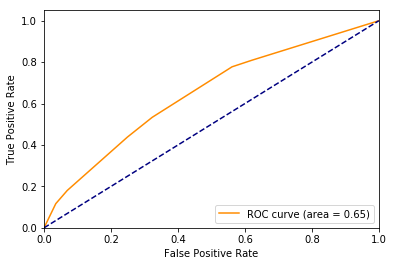

In [87]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100) # DT
drawAUROC(model,'DT_exp_3.csv')

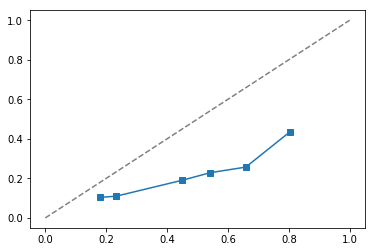

In [106]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
calibPlots(model,'DT_exp_3_cal.csv')

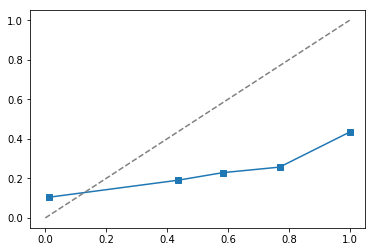

In [111]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
calibPlots_normalized(model,'DT_exp_3_NorCal.csv')

# tuning hyperparameters for SGD Classifier based on "roc_auc"

In [122]:
### SGBClassifier

parameters={'learning_rate':('constant','optimal','invscaling'),'eta0':(0.001,0.0001,0.00001),'loss':('modified_huber','squared_loss','squared_hinge','perceptron'),'penalty':('l2', 'l1', 'elasticnet')}
model = SGDClassifier(class_weight='balanced',random_state=100)
clf = GridSearchCV(model, parameters, n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'penalty': 'l1', 'loss': 'modified_huber', 'learning_rate': 'constant', 'eta0': 0.0001}
             precision    recall  f1-score   support

          0       0.85      0.84      0.85      1229
          1       0.35      0.37      0.36       283

avg / total       0.76      0.75      0.76      1512



In [156]:
clf_model=SGDClassifier(class_weight='balanced',penalty='l1',loss='modified_huber',learning_rate='constant',eta0=0.0001,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [157]:
results[0]

,metrics,Score
0,AUROC,0.689676
1,F1,0.361775
2,accuracy,0.752646
3,precision,0.349835
4,recall,0.374558
5,specificity,0.839707


In [158]:
results[1]


,metrics,Score
0,F1,0.404949
1,accuracy,0.650132
2,precision,0.297030
3,recall,0.636042
4,specificity,0.653377


In [159]:
results[2]

0.40141546283990714

In [160]:

# training set
Model = SGDClassifier(class_weight='balanced',penalty='l1',loss='modified_huber',learning_rate='constant',eta0=0.0001,random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.7310496276967035

# tuning hyperparameters for GrandientBoosting based on "roc_auc"

In [113]:
### 
# parameters={'max_depth':range(2,16,2), 'min_samples_split':range(30,500,40),'learning_rate':(0.0001,0.001,0.01,1e-05,0.1),'subsample':(0.1,0.2,0.3,0.4,0.5,0.6,0.8)}
# model = GradientBoostingClassifier(random_state=100)
# clf = GridSearchCV(model, parameters, n_jobs=-1,scoring='roc_auc', cv=5)
# clf.fit(X_train_transformed, y_train)
# print('The parameters of the best model are: ')
# print(clf.best_params_)
# y_pred = clf.predict(X_test_transformed)
# print(classification_report(y_test, y_pred))

In [ ]:
#########################################################

In [126]:
### 
parameters={'max_depth':range(5,16,2), 'min_samples_split':range(50,600,50),'learning_rate':(0.0001,0.001,0.01,1e-05,0.1),'subsample':(0.3,0.8,0.9)}
model = GradientBoostingClassifier(random_state=100)
clf = GridSearchCV(model, parameters, n_jobs=-1,scoring='roc_auc', cv=5)
clf.fit(X_train_transformed, y_train)
print('The parameters of the best model are: ')
print(clf.best_params_)
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

The parameters of the best model are: 
{'min_samples_split': 50, 'subsample': 0.3, 'learning_rate': 0.01, 'max_depth': 7}
             precision    recall  f1-score   support

          0       0.81      1.00      0.90      1229
          1       0.00      0.00      0.00       283

avg / total       0.66      0.81      0.73      1512



In [98]:
clf_model=GradientBoostingClassifier(min_samples_split=50,subsample=0.3,learning_rate=0.01,max_depth=7,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [99]:
results[0]

,metrics,Score
0,AUROC,0.697841
1,F1,0.000000
2,accuracy,0.812831
3,precision,0.000000
4,recall,0.000000
5,specificity,1.000000


In [100]:
results[1]

,metrics,Score
0,F1,0.418331
1,accuracy,0.672619
2,precision,0.313380
3,recall,0.628975
4,specificity,0.682669


In [101]:
results[2]

0.1726495802803383

In [96]:

# training set
Model = GradientBoostingClassifier(min_samples_split=50,subsample=0.3,learning_rate=0.01,max_depth=7,random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.8376480824150231

### AUROC plots for GrandientBoostingClassifier (GBDT)

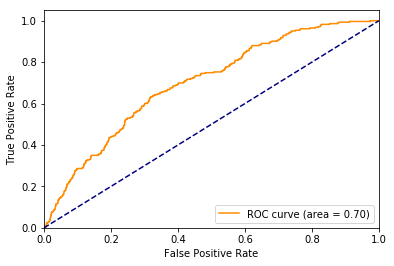

In [114]:
model=GradientBoostingClassifier(min_samples_split=50,subsample=0.3,learning_rate=0.01,max_depth=7,random_state=100) # GBDT
drawAUROC(model,'GBDT_exp_3.csv')

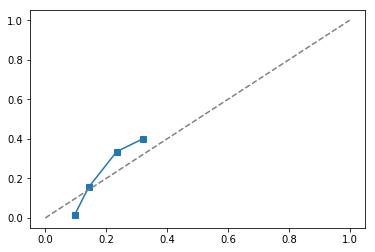

In [115]:
model=GradientBoostingClassifier(min_samples_split=50,subsample=0.3,learning_rate=0.01,max_depth=7,random_state=100) 
calibPlots(model,'GBDT_exp_3_cal.csv')

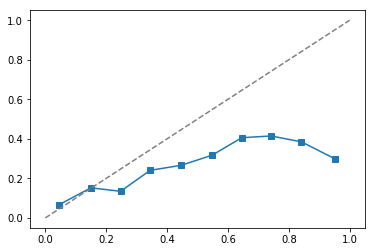

In [116]:
model=GradientBoostingClassifier(min_samples_split=50,subsample=0.3,learning_rate=0.01,max_depth=7,random_state=100) 
calibPlots_normalized(model,'GBDT__exp_3_NorCal.csv')

# GaussianNB

In [166]:
clf_model=GaussianNB()
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [167]:
results[0]

,metrics,Score
0,AUROC,0.489373
1,F1,0.308130
2,accuracy,0.195106
3,precision,0.183604
4,recall,0.957597
5,specificity,0.019528


In [168]:
results[1]

,metrics,Score
0,F1,0.311688
1,accuracy,0.193783
2,precision,0.185484
3,recall,0.975265
4,specificity,0.013832


In [169]:
results[2]

3.374789825801117e-61

In [170]:

# training set
Model = GaussianNB().fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.5174843558046229